# Round 2

## Setup

In [1]:
import nltk                                 # Has necessary modules for PoS Tagging
from nltk.corpus import stopwords           # Contains stop words that need to be removed
from nltk import pos_tag                    # Used to perform PoS Tagging
from nltk.corpus import wordnet             # Wordnet
from nltk.stem import WordNetLemmatizer     # For lemmatizing words

import spacy                                # For Name Entity Recognition
from spacy import displacy                  # For displaying NERed text

from sklearn.feature_extraction.text import TfidfVectorizer     # TF-IDF
from sklearn.metrics.pairwise import cosine_similarity          # Cosine similarity
import pandas as pd


import matplotlib.pyplot as plt     # For drawing graphs


T1 is "The Kingmakers, by Burton E. Stevenson.txt"

T2 is "The Return of Sherlock Holmes, by Sir Arthur Conan Doyle.txt"\n

T3 is "The Secret of Toni by Molly Elliot Seawell.txt"

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
all_stopwords = stopwords.words('english')

tokenized_texts = [[] for _ in range(3)]

for i in range(3):
    with open("T{}.txt".format(i + 1), "r") as text:
        tokenized_texts[i] = nltk.word_tokenize(text.read())
        tokenized_texts[i] = [word for word in tokenized_texts[i] if not word in all_stopwords]
    print(tokenized_texts[i][:50])


[nltk_data] Downloading package punkt to C:\Users\Shivesh
[nltk_data]     Kaundinya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Shivesh
[nltk_data]     Kaundinya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['countess', 'remond', 'selden', 'entering', 'dining', 'room', 'saw', 'lounge', 'crowded', 'paused', 'moment', 'look', 'half', 'hour', 'dinner', 'sporting', 'club', 'pleasantly', 'aware', 'odours', 'good', 'coffee', 'super', 'excellent', 'tobacco', 'mingled', 'delicate', 'expensive', 'perfumes', 'rising', 'clothes', 'hair', 'shoulders', 'women', 'lying', 'indolently', 'back', 'deep', 'chairs', 'women', 'dominated', 'scene', 'men', 'present', 'sure', 'unobtrusive', 'eye', 'strictly', 'utilitarian', 'donor']
['spring', 'year', '1894', 'london', 'interested', 'fashionable', 'world', 'dismayed', 'murder', 'honourable', 'ronald', 'adair', 'unusual', 'inexplicable', 'circumstances', 'public', 'already', 'learned', 'particulars', 'crime', 'came', 'police', 'investigation', 'good', 'deal', 'suppressed', 'upon', 'occasion', 'since', 'case', 'prosecution', 'overwhelmingly', 'strong', 'necessary', 'bring', 'forward', 'facts', 'end', 'nearly', 'ten', 'years', 'allowed', 'supply', 'missing', 'links

In [3]:
nltk.download('averaged_perceptron_tagger')

tagged_texts = [pos_tag(tokens) for tokens in tokenized_texts]

for tagged_text in tagged_texts:
    print(tagged_text[:50])

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Shivesh
[nltk_data]     Kaundinya\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('countess', 'NN'), ('remond', 'NN'), ('selden', 'JJ'), ('entering', 'VBG'), ('dining', 'VBG'), ('room', 'NN'), ('saw', 'VBD'), ('lounge', 'NN'), ('crowded', 'VBD'), ('paused', 'JJ'), ('moment', 'NN'), ('look', 'NN'), ('half', 'JJ'), ('hour', 'NN'), ('dinner', 'NN'), ('sporting', 'VBG'), ('club', 'NN'), ('pleasantly', 'RB'), ('aware', 'JJ'), ('odours', 'NNS'), ('good', 'JJ'), ('coffee', 'NN'), ('super', 'JJ'), ('excellent', 'JJ'), ('tobacco', 'NN'), ('mingled', 'VBD'), ('delicate', 'JJ'), ('expensive', 'JJ'), ('perfumes', 'NNS'), ('rising', 'VBG'), ('clothes', 'NNS'), ('hair', 'JJ'), ('shoulders', 'NNS'), ('women', 'NNS'), ('lying', 'VBG'), ('indolently', 'RB'), ('back', 'RB'), ('deep', 'JJ'), ('chairs', 'NNS'), ('women', 'NNS'), ('dominated', 'VBD'), ('scene', 'JJ'), ('men', 'NNS'), ('present', 'JJ'), ('sure', 'JJ'), ('unobtrusive', 'JJ'), ('eye', 'NN'), ('strictly', 'RB'), ('utilitarian', 'JJ'), ('donor', 'NN')]
[('spring', 'NN'), ('year', 'NN'), ('1894', 'CD'), ('london', 'NN'), ('

## Part A

In [4]:
# Filter all the noun and verb tags

all_noun_tags = []
all_verb_tags = []

for tagged_text in tagged_texts:
    all_noun_tags.append([])
    all_verb_tags.append([])
    for tag in tagged_text:
        if tag[1][:2] == 'NN':
            all_noun_tags[-1].append(tag)
        elif tag[1][:2] == 'VB':
            all_verb_tags[-1].append(tag)

print("\nNouns")
for tags in all_noun_tags:
    print(tags[:50])

print("\nVerbs")
for tags in all_verb_tags:
    print(tags[:50])



Nouns
[('countess', 'NN'), ('remond', 'NN'), ('room', 'NN'), ('lounge', 'NN'), ('moment', 'NN'), ('look', 'NN'), ('hour', 'NN'), ('dinner', 'NN'), ('club', 'NN'), ('odours', 'NNS'), ('coffee', 'NN'), ('tobacco', 'NN'), ('perfumes', 'NNS'), ('clothes', 'NNS'), ('shoulders', 'NNS'), ('women', 'NNS'), ('chairs', 'NNS'), ('women', 'NNS'), ('men', 'NNS'), ('eye', 'NN'), ('donor', 'NN'), ('picture', 'NN'), ('madonna', 'NN'), ('men', 'NNS'), ('donors', 'NNS'), ('things', 'NNS'), ('resemblance', 'NN'), ('nothing', 'NN'), ('madonna', 'NN'), ('women', 'NNS'), ('brune', 'NN'), ('contours', 'NNS'), ('quality', 'NN'), ('spirit', 'NN'), ('sisterhood', 'NN'), ('gowns', 'NNS'), ('material', 'NN'), ('degree', 'NN'), ('eccentricity', 'NN'), ('underlay', 'NN'), ('neck', 'NN'), ('rope', 'NN'), ('pearls', 'NN'), ('hand', 'NN'), ('diamonds', 'NNS'), ('treasures', 'NNS'), ('creations', 'NNS'), ('beauty', 'NN'), ('difference', 'NN'), ('beauty', 'NN')]
[('spring', 'NN'), ('year', 'NN'), ('london', 'NN'), ('wo

In [5]:
nltk.download('wordnet')

# Function to take nouns and verbs of a text and return corresponding frequency dictionaries
def create_dictionaries(*args):
  # First dictionary is for nouns
  # Second dictionary is for verbs
  dicts = ({}, {})

  for i in range(2):
    for tag in args[i]:
      syn = wordnet.synsets(tag[0])
      for s in syn:
        x = s.lexname()
        if x[0] == 'nv'[i]:
          if x in dicts[i]:
            dicts[i][x] += 1
          else:
            dicts[i][x] = 1

  return dicts


[nltk_data] Downloading package wordnet to C:\Users\Shivesh
[nltk_data]     Kaundinya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
# Draws a bar graph for a given frequency distribution
def bar_graph(dictionary, color):
    plt.bar(dictionary.keys(), dictionary.values(), color=color)
    y_pos = range(len(dictionary.keys()))
    plt.xticks(y_pos, dictionary.keys(), rotation=90)
    plt.show()


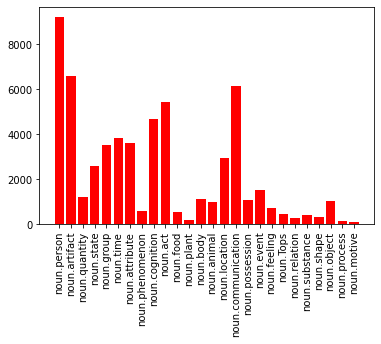

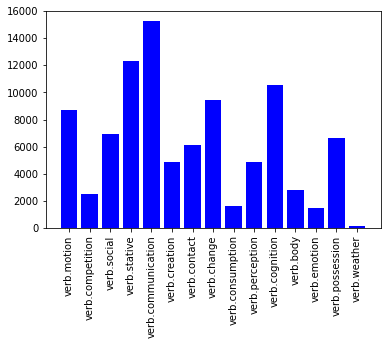

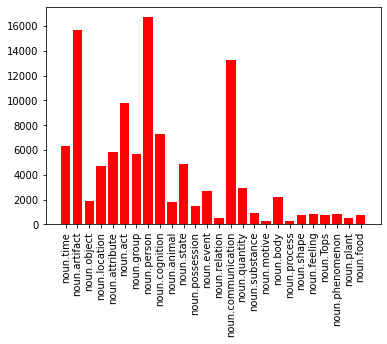

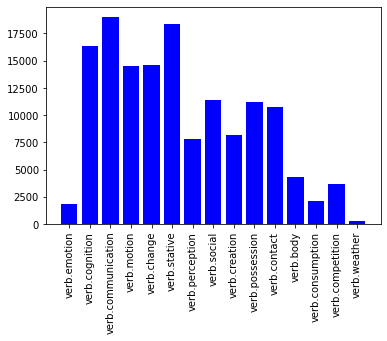

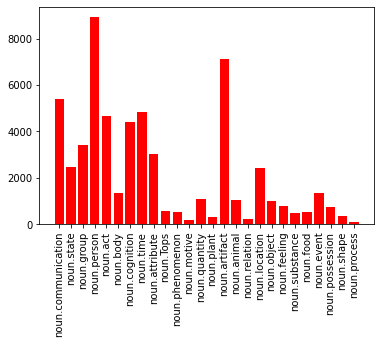

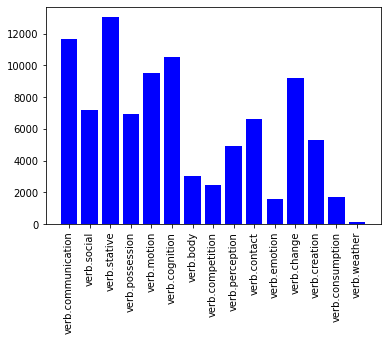

In [7]:
# For every text, create its frequency dictionary and draw the bar graph
for idx in range(3):
    noun_dict, verb_dict = create_dictionaries(all_noun_tags[idx], all_verb_tags[idx])
    bar_graph(noun_dict, 'r')
    bar_graph(verb_dict, 'b')


## Part B

In [8]:
recogniser = spacy.load('en_core_web_sm')

# Function to get tokens of a text and display a NERed text
def NER(tokens):
    text = ' '.join(tokens)
    data = recogniser(text)
    displacy.render(data[:100], style="ent", jupyter=True)

# Description for a few tags
print(spacy.explain("PERSON"))
print(spacy.explain("LOC"))
print(spacy.explain("ORG"))

# Perform NER for all the texts
for tokens in tokenized_texts:
    NER(tokens[:500])


People, including fictional
Non-GPE locations, mountain ranges, bodies of water
Companies, agencies, institutions, etc.


## Part C

In [11]:

lemmatizer = WordNetLemmatizer()

def lemmatize(tokens):
    lemmatized_tokens = []
    for t in tokens:
        lemmatized_tokens.append(lemmatizer.lemmatize(t))
    return ' '.join(lemmatized_tokens)

vectorizer = TfidfVectorizer(min_df=0.1, stop_words=all_stopwords)


#### Without Lemmatization

In [12]:
corpus1 = [' '.join(tokens) for tokens in tokenized_texts]

tfidf = vectorizer.fit_transform(corpus1)
pd.DataFrame(tfidf.toarray(), 
                columns=vectorizer.get_feature_names(), 
                index=['B1', 'B2', 'B3'])


C:\Users\Shivesh Kaundinya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,12,123,13,131,13th,144,14th,15,16,...,youthful,youths,yoxley,ysaye,ze,zealous,zenith,zephyr,zest,zoo
B1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000942,0.000000,0.000000,0.000942,0.000000,0.000000,0.000000,0.000000,0.000000
B2,0.000000,0.000743,0.000000,0.000743,0.001485,0.000743,0.000000,0.000743,0.000743,0.001485,...,0.000565,0.000000,0.005198,0.000000,0.000000,0.000743,0.000743,0.000000,0.000743,0.000743
B3,0.000686,0.000000,0.000686,0.000000,0.000000,0.000000,0.000686,0.000000,0.000000,0.000000,...,0.001044,0.000000,0.000000,0.001373,0.000000,0.000000,0.000000,0.000686,0.000000,0.000000


In [13]:
print("Cosine Similarity before Lemmatization")
print("T1 and T2: {}".format(cosine_similarity(tfidf[0], tfidf[1])))
print("T2 and T3: {}".format(cosine_similarity(tfidf[1], tfidf[2])))
print("T3 and T1: {}".format(cosine_similarity(tfidf[2], tfidf[0])))


Cosine Similarity before Lemmatization
T1 and T2: [[0.44136571]]
T2 and T3: [[0.25574917]]
T3 and T1: [[0.26359758]]


#### With Lemmatization

In [14]:

corpus2 = [lemmatize(tokens) for tokens in tokenized_texts]

tfidf = vectorizer.fit_transform(corpus2)
pd.DataFrame(tfidf.toarray(), 
                columns=vectorizer.get_feature_names(), 
                index=['B1', 'B2', 'B3'])


C:\Users\Shivesh Kaundinya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,12,123,13,131,13th,144,14th,15,16,...,youth,youthful,yoxley,ysaye,ze,zealous,zenith,zephyr,zest,zoo
B1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.005472,0.000000,0.000000,0.000000,0.000926,0.000000,0.000000,0.000000,0.000000,0.000000
B2,0.000000,0.000733,0.000000,0.000733,0.001466,0.000733,0.000000,0.000733,0.000733,0.001466,...,0.002165,0.000558,0.005132,0.000000,0.000000,0.000733,0.000733,0.000000,0.000733,0.000733
B3,0.000681,0.000000,0.000681,0.000000,0.000000,0.000000,0.000681,0.000000,0.000000,0.000000,...,0.002011,0.001036,0.000000,0.001362,0.000000,0.000000,0.000000,0.000681,0.000000,0.000000


In [15]:
print("Cosine Similarity after Lemmatization")
print("T1 and T2: {}".format(cosine_similarity(tfidf[0], tfidf[1])))
print("T2 and T3: {}".format(cosine_similarity(tfidf[1], tfidf[2])))
print("T3 and T1: {}".format(cosine_similarity(tfidf[2], tfidf[0])))


Cosine Similarity after Lemmatization
T1 and T2: [[0.45475273]]
T2 and T3: [[0.26692572]]
T3 and T1: [[0.27430117]]
